In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


"message":[
            "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. ",
            "Nah I don't think he goes to usf, he lives around here though.",
            "FreeMsg Hey there darling it's been 3 week's now and no word back!",
            "Even my brother is not like to speak with me.They treat me like aids patent.",
            "WINNER!! As a valued network customer you have been selected to receivea €900 prize reward!"
],
    
"label":["spam", "ham", "spam", "ham", "spam"]

In [2]:
data = {
    "message":[
            "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. ",
            "Nah I don't think he goes to usf, he lives around here though.",
            "FreeMsg Hey there darling it's been 3 week's now and no word back!",
            "Even my brother is not like to speak with me.They treat me like aids patent.",
            "WINNER!! As a valued network customer you have been selected to receivea €900 prize reward!"
],

"label":["spam", "ham", "spam", "ham", "spam"]

}

df = pd.DataFrame(data)

## **Seperating Messages and Labels**

In [3]:
messages = df["message"].values
labels = df["label"].values

## **Label Encoding**

In [4]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

## **Tokenize & Padding**

In [5]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(messages)
X = tokenizer.texts_to_sequences(messages)
X = pad_sequences(X)

## **Splitting into Training and Test Sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

##  **Creating a LSTM Model**

In [7]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation="sigmoid"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## **Model Compilation**

In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## **Model Training**

In [9]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), verbose=2)

Epoch 1/5
1/1 - 5s - 5s/step - accuracy: 0.7500 - loss: 0.6890 - val_accuracy: 0.0000e+00 - val_loss: 0.6971
Epoch 2/5
1/1 - 0s - 174ms/step - accuracy: 1.0000 - loss: 0.6819 - val_accuracy: 0.0000e+00 - val_loss: 0.7042
Epoch 3/5
1/1 - 0s - 288ms/step - accuracy: 0.7500 - loss: 0.6711 - val_accuracy: 0.0000e+00 - val_loss: 0.7118
Epoch 4/5
1/1 - 0s - 112ms/step - accuracy: 1.0000 - loss: 0.6599 - val_accuracy: 0.0000e+00 - val_loss: 0.7206
Epoch 5/5
1/1 - 0s - 191ms/step - accuracy: 1.0000 - loss: 0.6392 - val_accuracy: 0.0000e+00 - val_loss: 0.7309


## **Model Visualization**

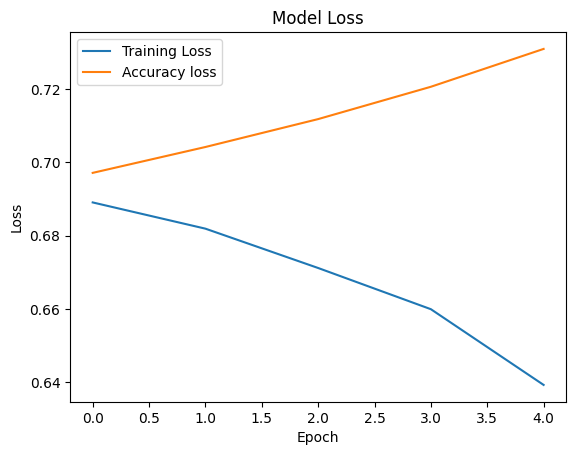

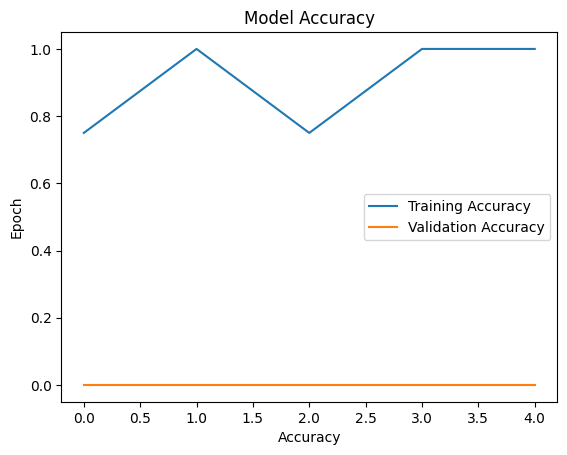

In [10]:
# Visualization of training loss

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Accuracy loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualization of Training Accuracy

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()


### **Graph Interpretation**

**First Graph Interpretation**

In the "Model loss" graph, we can see the missing values ​​on the training data. We  obtain a graph showing how well the model fits the training system.

**Training Loss**: In the graph, we can see that the training loss decreases as the number of epochs increases. This tells us that the model learns by reducing its error in the training data.

**Accuracy Loss**: We can see the performance of the model on new data in the missing values ​​on the data.

We can see that the validation loss also decreases initially, but then starts to increase at a certain point. This increase tells us that the model is starting to overfit..

**Second Graph Interpretation**


In the “Model accuracy” graph, our accuracy on the training data tells the classification success of the model on the training data.

**Training Accuracy**:The graph shows that the training accuracy increases as the number of epochs increases. This shows us that the performance of the model on the training data is improving.

**Validation Accuracy**: Accuracies on validation data indicate the model's classification success on new data.

We can say that the verification accuracy initially increases but after a certain point it either plateaus or decreases.



## **Guessing with New Messages**

In [11]:
new_messages = ["Congratulations!You've won a free ticket to Bahamas.",
                "Can we meet tomorrow for coffee?"]

new_messages_seq = tokenizer.texts_to_sequences(new_messages)
new_messages_padded = pad_sequences(new_messages_seq, maxlen=X.shape[1])

# Making prediction
predictions = model.predict(new_messages_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

# Writing prediction

for i, message in enumerate(new_messages):
  print(f"Message:{message} - Prediction : {'Spam' if predictions[i]==1 else 'Ham'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Message:Congratulations!You've won a free ticket to Bahamas. - Prediction : Spam
Message:Can we meet tomorrow for coffee? - Prediction : Spam


**The comment**

* We can say that guessed the message in the first sentence correctly.
* We can say that may have guessed the message in the second sentence incorrectly due to overfitting.